# Exploratory Plots With Pandas

## Load packages and sample data

Most visualizations in this notebook require only the Pandas library. We import seaborn just for the sample dataset.

In [ ]:
pip install pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df = sns.load_dataset("mpg") 

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Create a new column to get some more categorical data

In [ ]:
def get_brand_from_name(name_str):
  return(name_str.split(" ")[0])

In [ ]:
df['brand'] = df['name'].apply(get_brand_from_name)

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


## Distributions

### Categorical data

#### Vertical bar charts

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html

Plot the absolute frequencies of a column with a bar chart, rotate labels by 45°.

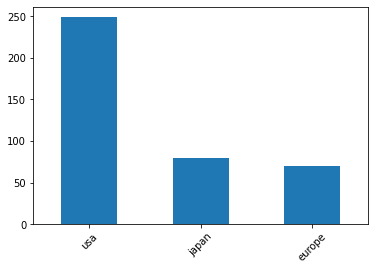

In [ ]:
df['origin'].value_counts().plot.bar(rot = 45)

Plot the relative frequencies of a column with a bar chart, rotate labels by 45°.

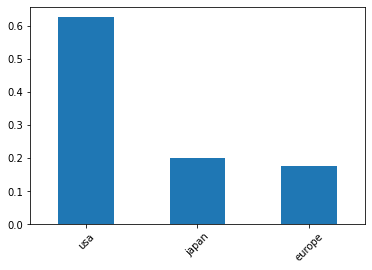

In [ ]:
df['origin'].value_counts(normalize = True).plot.bar(rot = 45)

#### Horizontal bar charts

(better suited for long labels)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html


<Axes: >

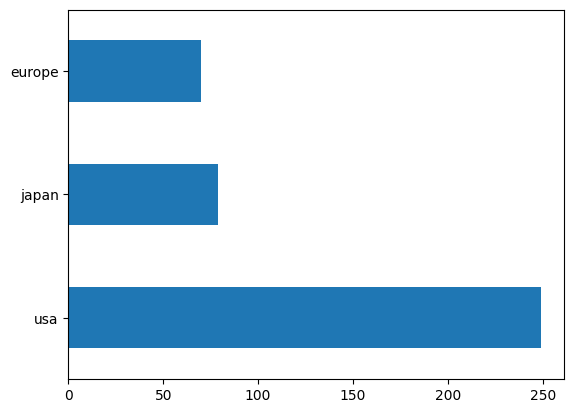

In [ ]:
df['origin'].value_counts().plot.barh()

#### Heatmaps

Simple version of a colored multidimensional frequency table using pd.pivot_table.

In [ ]:
pd.pivot_table(df, index = ["origin", "brand"], 
               values = ["name"], 
               aggfunc = "nunique").style.background_gradient(cmap='Blues')

### Numeric

#### Histograms

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

Generate a histogram plot a column with custom bins.

<Axes: ylabel='Frequency'>

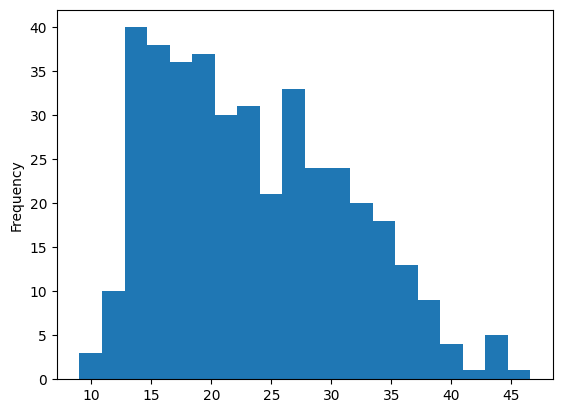

In [ ]:
df['mpg'].plot.hist(bins = 20)

#### Boxplots

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html

Generate a boxplot for a column.

<Axes: >

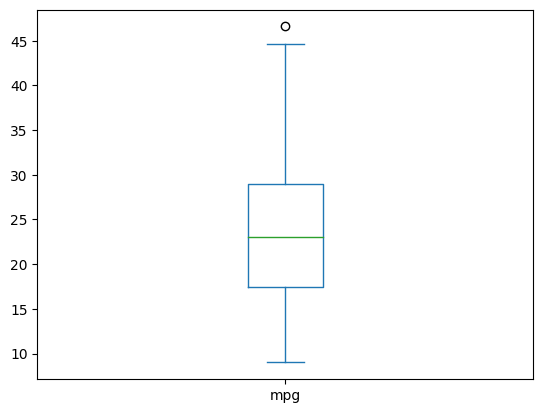

In [ ]:
df['mpg'].plot.box()

## Comparisons

### Single numeric variable by category

#### Pivot table with bar charts

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

<Axes: xlabel='origin'>

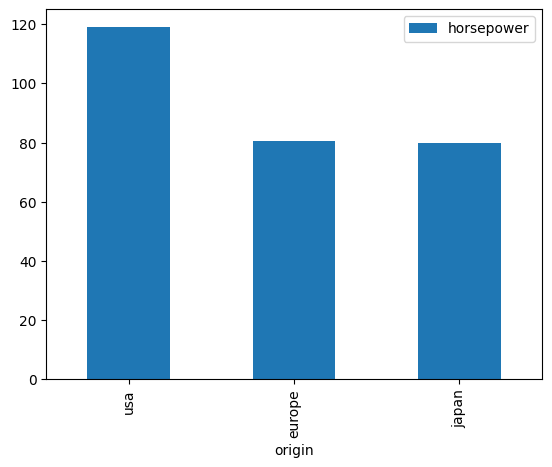

In [ ]:
# note how .bar is called as a sub method of plot of a dataframe object (the pivot table), not a column (series)

(pd
 .pivot_table(data = df, index = ["origin"], values = ['horsepower'], aggfunc = 'mean' )
 .sort_values("horsepower", ascending = False)
 .reset_index()
 .plot
 .bar(x = "origin", y = "horsepower"))

#### Horizontal Barchart 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

For lots of categories / categories with long names

<Axes: ylabel='brand'>

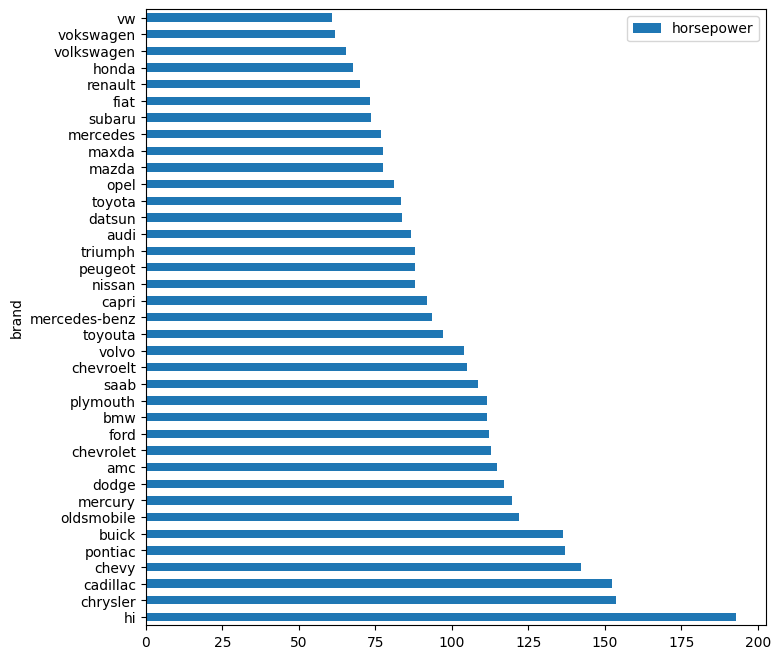

In [ ]:
(pd
 .pivot_table(data = df, 
              index = ["brand"], 
              values = ['horsepower'], 
              aggfunc = 'mean' )
 .sort_values("horsepower", ascending = False)
 .plot
 .barh(figsize = (8, 8)))

#### Box plots from dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

Create a boxplot of a variable grouped by another variable from the same dataframe.

<Axes: title={'center': 'horsepower'}, xlabel='origin'>

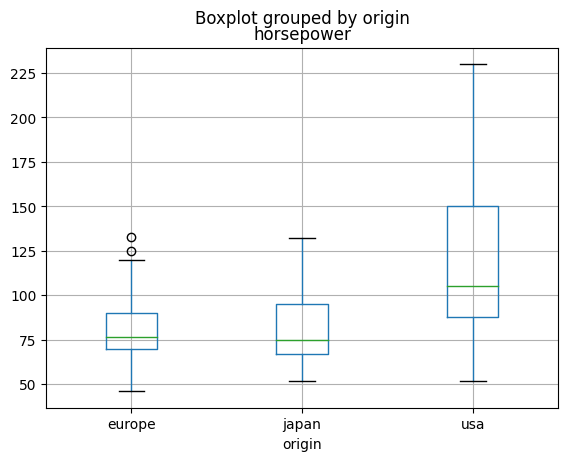

In [ ]:
df.boxplot(column = "horsepower", by = "origin")

### Multiple numeric variables by category

#### Multi Barcharts

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

This code generates a multi bar chart showing the aggregated values of multiple columns grouped by another column of the same dataframe.

<Axes: xlabel='origin'>

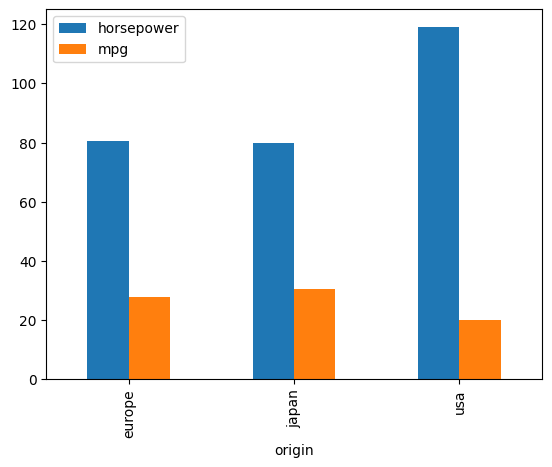

In [ ]:
(pd
 .pivot_table(data = df, 
              index = ["origin"], 
              values = ['horsepower', 'mpg'], 
              aggfunc = 'mean' )
 .plot
 .bar(stacked = False))

### Category breakdown

#### Stacked Barcharts

https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

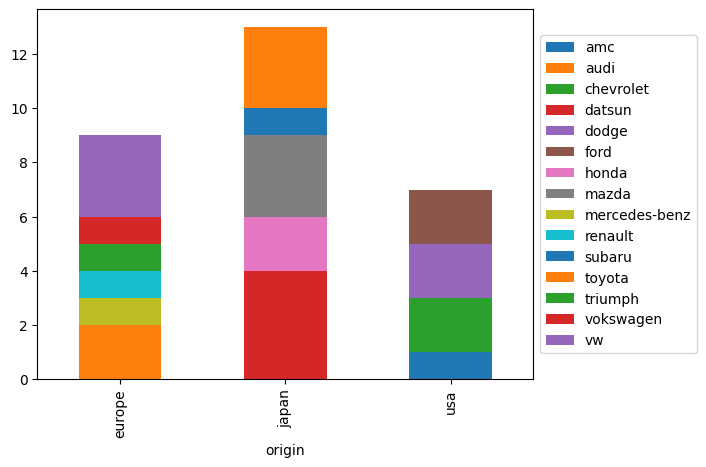

In [ ]:
(pd.pivot_table(
    df.query("model_year == 80"), 
    index = ['origin'], 
    columns = 'brand', 
    values = "name", 
    aggfunc = 'nunique')
.plot
.bar(stacked = True)
.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)))

### 2 Axes Chart

In [ ]:
df1 = pd.pivot_table(df, index = "origin", values = "name", aggfunc = "nunique")
df1

,name
origin,
europe,58
japan,60
usa,187


In [ ]:
df2 = pd.pivot_table(df, index = "origin", values = "mpg", aggfunc = "mean")
df2

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


Create a two axes plot with a bar chart for the left axis and a line chart for the right axis.

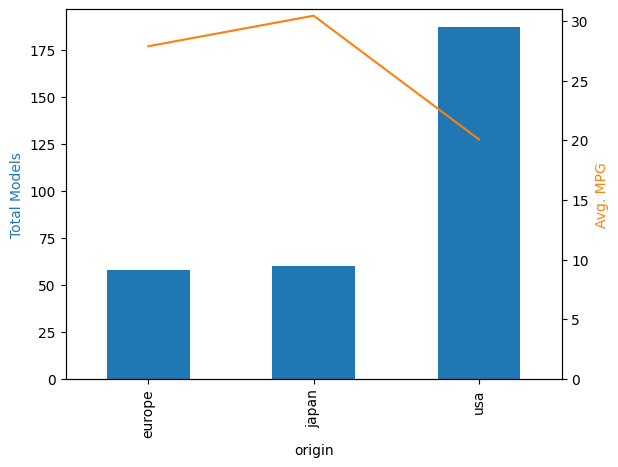

In [ ]:
import matplotlib.pyplot as plt
# Create matplotlib figure
fig = plt.figure() 

# Create matplotlib axes
ax = fig.add_subplot() 
ax2 = ax.twinx()

# Plot the data
df1['name'].plot(kind='bar', color='tab:blue', ax=ax)
df2['mpg'].plot(kind='line', color='tab:orange', ax=ax2)

# Styling
ax.set_ylabel('Total Models')
ax2.set_ylabel('Avg. MPG')
ax2.set_ylim(bottom = 0)
ax.yaxis.label.set_color('tab:blue')
ax2.yaxis.label.set_color('tab:orange') 
plt.show()

## Relationships

### Two numerical variables

#### Scatter plot

https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html


Create a scatter plot of two numeric variables with custom colors

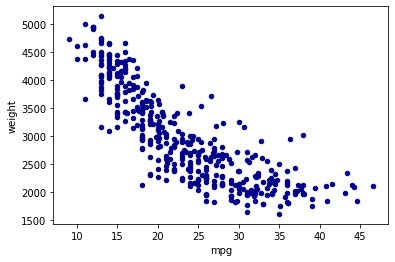

In [ ]:
df.plot.scatter(x='mpg', y='weight', c='DarkBlue')

### Two Numeric + 1 Categorical Variable

#### Scatter plot with groups

https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html


Create a custom color map based on values of one categorical column and apply it to the scatter plot of two numeric columns.

<Axes: xlabel='mpg', ylabel='weight'>

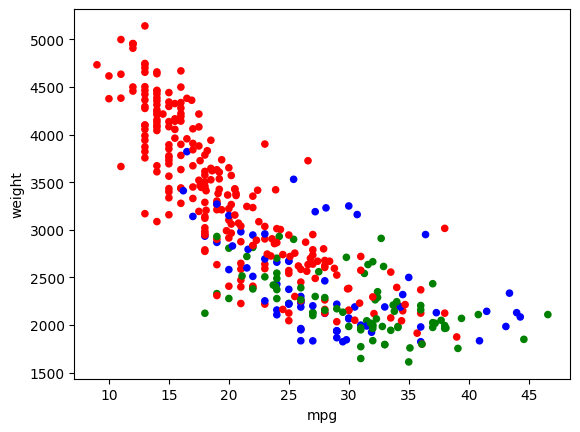

In [ ]:
colors = {'europe':'blue', 'usa':'red', 'japan':'green'}
df.plot.scatter(x='mpg', y='weight', c=df['origin'].map(colors))

Automatic color mapping for lots of categories

<Axes: xlabel='mpg', ylabel='weight'>

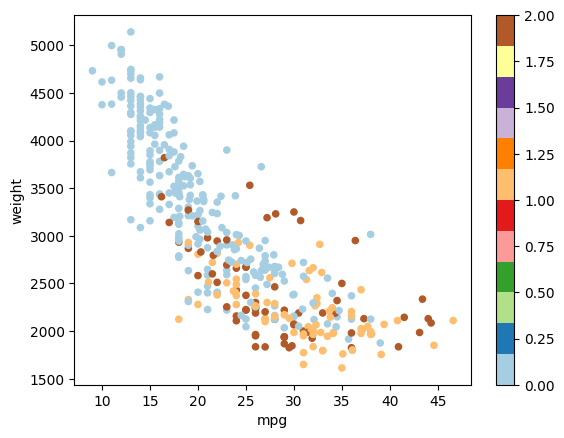

In [ ]:
# colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
colors = pd.factorize(df['origin'])[0]
df.plot.scatter(x='mpg', y='weight', c=colors, colormap = "Paired")

Automatic color mapping with custom labels (easier done in seaborn)

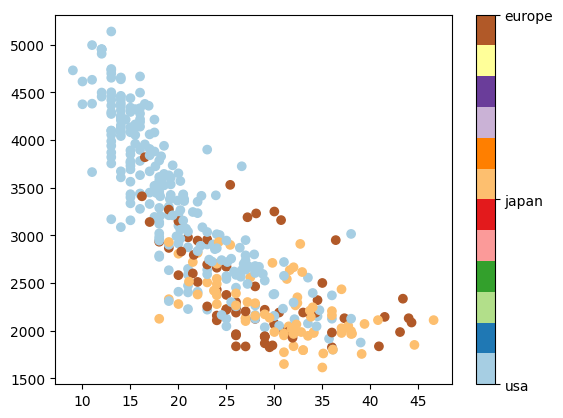

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# specify the categorical column
cat_column_encoded, cat_column_categories = df['origin'].factorize()

# create a scatter plot with a colormap based on the categorical column
plt.scatter(x=df['mpg'], y=df['weight'], c=cat_column_encoded, cmap='Paired')

# add a colorbar to the plot
cb = plt.colorbar()
cb.set_ticks(np.arange(len(cat_column_categories)))
cb.set_ticklabels(cat_column_categories)

# show the plot
plt.show()

# -> easier done in seaborn

Use categorical variable to color scatterplot in seaborn


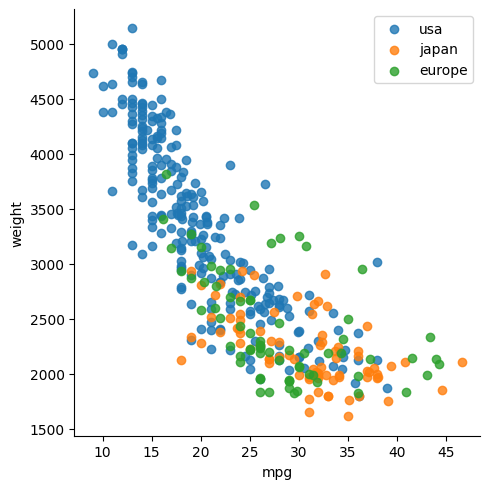

In [ ]:
import seaborn as sns
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="mpg", y="weight", data=df, fit_reg=False, hue='origin', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

plt.show()

### Time series

#### Line charts

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html

Create a simple line chart from two columns

<Axes: xlabel='model_year'>

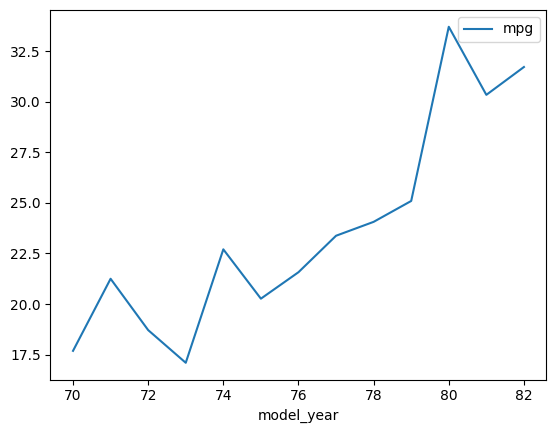

In [ ]:
(pd
.pivot_table(data = df, 
             index = ['model_year'], 
             values = ['mpg'], 
             aggfunc = 'mean')
.plot
.line())

Create a line chart with multiple lines for multiple columns.

<Axes: xlabel='model_year'>

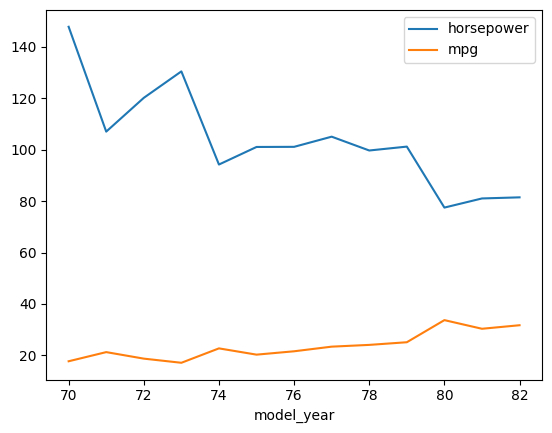

In [ ]:
(pd
.pivot_table(data = df, 
             index = ['model_year'], 
             values = ['mpg', 'horsepower'], 
             aggfunc = 'mean')
.plot
.line())

Create a line chart with multiple lines for multiple columns and two axes.

<Axes: >

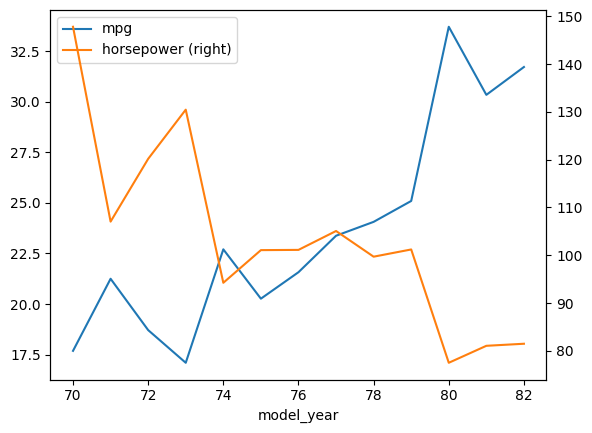

In [ ]:
fig, ax = plt.subplots() 
pivot = pd.pivot_table(df, index = ['model_year'], values = ['mpg', 'horsepower'], aggfunc = 'mean').reset_index()
pivot.plot(x = 'model_year', y = 'mpg', ax = ax) 
pivot.plot(x = 'model_year', y = 'horsepower', ax = ax, secondary_y = True) 

## Bonus

### Create visualizations with the help of ChatGPT

**Steps:**

1. Open chat.openai.com
2. Paste the following prompt
3. Edit according to your needs
4. Run and check the generated code

**Prompt:**

```
Task: Write Python code
Frameworks: Pandas + Matplotlib
Output_Format: Code only
Variable_names_delimiter: "'"
Input_data: Dataframe stored as 'df'
Tasks:
- group 'horsepower' by 'origin'
- aggregation: mean
- plot as bar chart
```

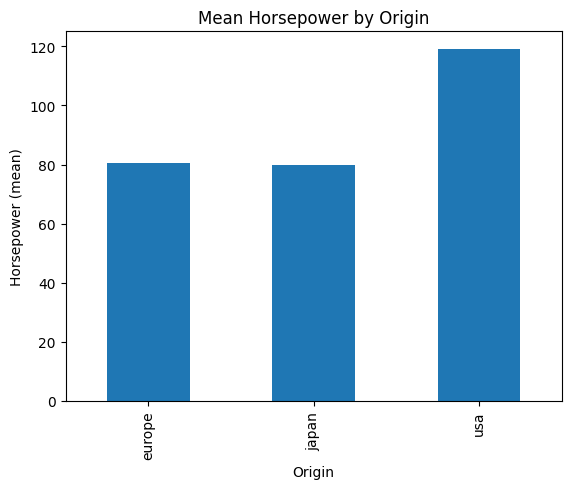

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# group horsepower by origin and calculate mean
grouped_df = df.groupby('origin')['horsepower'].mean()

# plot the grouped data as a bar chart
grouped_df.plot(kind='bar')
plt.xlabel('Origin')
plt.ylabel('Horsepower (mean)')
plt.title('Mean Horsepower by Origin')
plt.show()


#### Example 2: 

Same with Seaborn library:


```
Task: Write Python code
Frameworks: Pandas + Seaborn
Output_Format: Code only
Variable_names_delimiter: "'"
Input_data: Dataframe stored as 'df'
Tasks:
- group 'horsepower' by 'origin'
- aggregation: mean
- plot as bar chart
```



<Axes: xlabel='origin', ylabel='horsepower'>

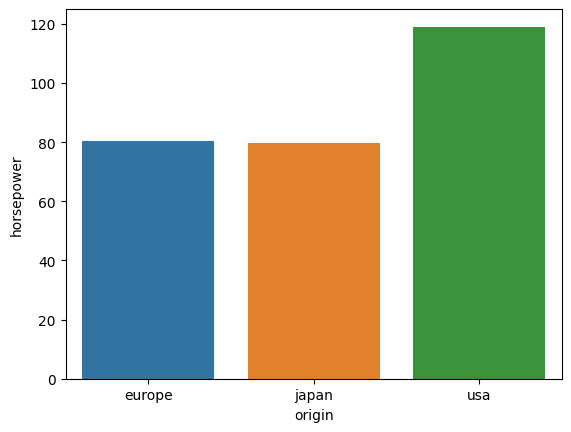

In [45]:
import pandas as pd
import seaborn as sns

# group horsepower by origin and calculate mean
df_grouped = df.groupby('origin')['horsepower'].mean().reset_index()

# plot as bar chart
sns.barplot(x='origin', y='horsepower', data=df_grouped)
